In [1]:
import h5py
import math
import bisect
import numpy as np
import pandas as pd
from scipy import stats
from scipy.interpolate import make_interp_spline
import matplotlib
import matplotlib.font_manager
import matplotlib.pyplot as plt
matplotlib.font_manager._rebuild()
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
from IPython.display import set_matplotlib_formats
from IPython.display import display, Latex
set_matplotlib_formats('png', 'pdf')
import seaborn as sns

In [2]:
# Setze Helvetica als Standardschrift
plt.rcParams['font.family'] = 'Helvetica'

# Setze den Hintergrund von Figure und Axes auf #121212
plt.rcParams['figure.facecolor'] = '#121212'  # Hintergrund der gesamten Figur
plt.rcParams['axes.facecolor'] = '#121212'    # Hintergrund der Plot-Achsen

# Setze Schriftfarbe für Achsenlabels, Titel und Ticklabels auf #DDDDDD
plt.rcParams['text.color'] = '#DDDDDD'  
plt.rcParams['axes.labelcolor'] = '#DDDDDD'  
plt.rcParams['xtick.color'] = '#DDDDDD'  
plt.rcParams['ytick.color'] = '#DDDDDD'  

# Setze die Farbe der Rahmenlinien um den Plot (optional etwas dunkler)
plt.rcParams['axes.edgecolor'] = '#DDDDDD'  

background = '#121212'
mywhite = '#DDDDDD'

#core colors:
hellblau = '#56B4E9'
gruen = '#3D9B74'
sanftgelb = '#F2C94C'
koralle = '#F26B38'
rosa = '#F48FB1'

#backup colors
bahamagelb = '#F9C200'
chartreusegruen = '#A9E400'
weichmagenta = '#FF4081'
bordeaux = '#6A0D3D'

In [3]:
class Data:
    def __init__(self, file):
        self.x = np.array(file['BubbleScale/Variable'])
        self.imagx = np.array(file['BubbleScale/Imag'])
        self.realx = np.array(file['BubbleScale/Real'])
        self.imagDeriv = np.array(file['BubbleScale/ImagDeriv'])
        self.alpha = file['BubbleScale'].attrs['alphaT']
                
        self.aPos = file['SelfEnergy'].attrs['aPos']
        self.aNeg = file['SelfEnergy'].attrs['aNeg']
        self.M = file['SelfEnergy'].attrs['M']
        self.N = file['SelfEnergy'].attrs['N']
        self.v = file['SelfEnergy'].attrs['v']
        self.b = file['SelfEnergy'].attrs['b']
        
        
        self.kr = np.array(file['SelfEnergyRadial/kr'])
        self.radSePos = np.array(file['SelfEnergyRadial/seRadPos'])
        self.radSeNeg = np.array(file['SelfEnergyRadial/seRadNeg'])
        
        
        self.ktilde = np.array(file['SelfEnergyTangential/ktilde'])
        self.atPos = np.array(file['SelfEnergyTangential/atPos'])
        self.atNeg = np.array(file['SelfEnergyTangential/atNeg'])
        self.interk = np.array(file['SelfEnergyTangential/interk'])
        self.subtractPos = np.array(file['SelfEnergyTangential/subtractPos'])
        self.subtractNeg = np.array(file['SelfEnergyTangential/subtractNeg'])
        self.freqs = np.array(file['SelfEnergyTangential/freqs'])
        self.freqPos = np.array(file['SelfEnergyTangential/freqPos'])
        self.freqNeg = np.array(file['SelfEnergyTangential/freqNeg'])
        self.dPos = file['SelfEnergyTangential'].attrs['DPos']
        self.dNeg = file['SelfEnergyTangential'].attrs['DNeg']
        self.cPos = file['SelfEnergyTangential'].attrs['CPos']
        self.cNeg = file['SelfEnergyTangential'].attrs['CNeg']
        self.deltab = file['SelfEnergyTangential'].attrs['deltab']

In [4]:
import glob

file_list = glob.glob('refined*.h5')
file_list.sort()

In [5]:
#important!! We want M=1 but used M=3 for calculation. Hence divide deltab by M
alpha = []
deltab = []
for file_name in file_list:
    foo = Data(h5py.File(file_name,'r'))
    alpha.append(foo.alpha)
    deltab.append(foo.deltab/foo.M)

In [6]:
alpha = np.array(alpha)
deltab = np.array(deltab)

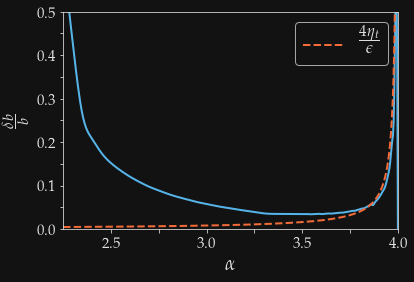

In [9]:
X_Y_Spline = make_interp_spline(alpha, deltab)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(alpha.min(), alpha.max(), 500)
Y_ = X_Y_Spline(X_)

plt.plot(X_, Y_,linewidth=2,color=hellblau)

plt.xlabel(r'$\alpha$',fontsize=20)
plt.ylabel(r'$\frac{\delta b}{b}$',fontsize=20)
#plt.axhline(0.0,linestyle='--',color='black')
plt.xlim([2.25,4])
plt.ylim([0,0.5])

def f(x):
    return 4*0.002/(4-x)
f2 = np.vectorize(f)
x = np.linspace(2.0, 3.99, 5000)
plt.plot(x, f2(x),label=r'$\frac{4\eta_t}{\epsilon}$',linestyle='dashed',color=koralle,linewidth=2)

xticks = np.arange(2.5,4.1,0.25)
xlabels = [str(2.5),'',str(3.0),'',str(3.5),'',str(4.0)]
plt.xticks(xticks,labels=xlabels,fontsize=15)

yticks = np.arange(0.0,0.51,0.05)
ylabels = [str(0.0),'',str(0.1),'',str(0.2),'',str(0.3),'',str(0.4),'',str(0.5)]
plt.yticks(yticks,labels=ylabels,fontsize=15)

plt.legend(fontsize=20)
plt.savefig('Graphics/deltab_dark.pdf',format="pdf", dpi=300,bbox_inches='tight',transparent=True)
plt.show()

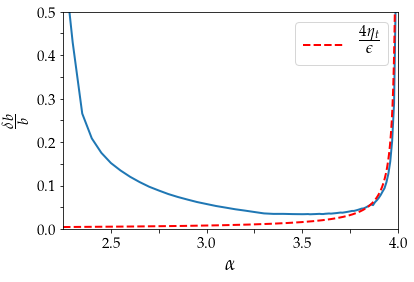

In [16]:
plt.plot(alpha[:-1:],deltab[:-1:],linewidth=2)

plt.xlabel(r'$\alpha$',fontsize=20)
plt.ylabel(r'$\frac{\delta b}{b}$',fontsize=20)
#plt.axhline(0.0,linestyle='--',color='black')
plt.xlim([2.25,4])
plt.ylim([0,0.5])

def f(x):
    return 4*0.002/(4-x)
f2 = np.vectorize(f)
x = np.linspace(2.0, 3.99, 5000)
plt.plot(x, f2(x),label=r'$\frac{4\eta_t}{\epsilon}$',linestyle='dashed',color='red',linewidth=2)

xticks = np.arange(2.5,4.1,0.25)
xlabels = [str(2.5),'',str(3.0),'',str(3.5),'',str(4.0)]
plt.xticks(xticks,labels=xlabels,fontsize=15)

yticks = np.arange(0.0,0.51,0.05)
ylabels = [str(0.0),'',str(0.1),'',str(0.2),'',str(0.3),'',str(0.4),'',str(0.5)]
plt.yticks(yticks,labels=ylabels,fontsize=15)

plt.legend(fontsize=20)
#plt.savefig('Graphics/newDeltab1.pdf',bbox_inches="tight")
plt.show()

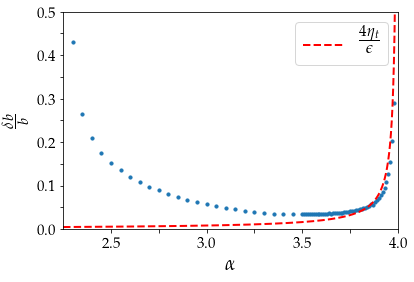

In [7]:
plt.scatter(alpha[:-1:],deltab[:-1:],s=10)

plt.xlabel(r'$\alpha$',fontsize=20)
plt.ylabel(r'$\frac{\delta b}{b}$',fontsize=20)
#plt.axhline(0.0,linestyle='--',color='black')
plt.xlim([2.25,4])
plt.ylim([0,0.5])

def f(x):
    return 4*0.002/(4-x)
f2 = np.vectorize(f)
x = np.linspace(2.0, 3.99, 5000)
plt.plot(x, f2(x),label=r'$\frac{4\eta_t}{\epsilon}$',linestyle='dashed',color='red',linewidth=2)

xticks = np.arange(2.5,4.1,0.25)
xlabels = [str(2.5),'',str(3.0),'',str(3.5),'',str(4.0)]
plt.xticks(xticks,labels=xlabels,fontsize=15)

yticks = np.arange(0.0,0.51,0.05)
ylabels = [str(0.0),'',str(0.1),'',str(0.2),'',str(0.3),'',str(0.4),'',str(0.5)]
plt.yticks(yticks,labels=ylabels,fontsize=15)

plt.legend(fontsize=20)
#plt.savefig('Graphics/newDeltab1.pdf',bbox_inches="tight")
plt.show()

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


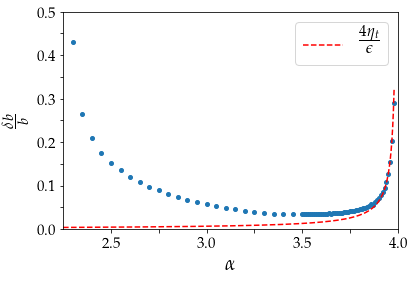

In [8]:
plt.scatter(alpha[:-1:],deltab[:-1:],s=16)

plt.xlabel(r'$\alpha$',fontsize=20)
plt.ylabel(r'$\frac{\delta b}{b}$',fontsize=20)
#plt.axhline(0.0,linestyle='--',color='black')
plt.xlim([2.25,4])
plt.ylim([0,0.5])

etat = 0.0016

def f(x):
    return 4*etat/(4-x)
f2 = np.vectorize(f)
x = np.linspace(2.0, 3.98, 5000)
plt.plot(x, f2(x),label=r'$\frac{4\eta_t}{\epsilon}$',linestyle='dashed',color='red')

xticks = np.arange(2.5,4.1,0.25)
xlabels = [str(2.5),'',str(3.0),'',str(3.5),'',str(4.0)]
plt.xticks(xticks,labels=xlabels,fontsize=15)

yticks = np.arange(0.0,0.51,0.05)
ylabels = [str(0.0),'',str(0.1),'',str(0.2),'',str(0.3),'',str(0.4),'',str(0.5)]
plt.yticks(yticks,labels=ylabels,fontsize=15)

plt.legend(fontsize=20)
#plt.savefig('Graphics/refinedDeltab.pdf',bbox_inches="tight")
plt.show()